<a href="https://colab.research.google.com/github/ekasetyo090/youtube-trend-analizer/blob/master/youtube_trend_analizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# READ ME
#### Google Colab Usage Tutorial https://www.youtube.com/watch?v=inN8seMm7UI
#### This is a Python script for processing data from Google Trends and performing visualization.
# --------------------------------------------------------------
#### The main purpose of creating this script is to facilitate keyword research for obtaining the best traffic and for better understanding keywords in-depth.
# --------------------------------------------------------------
#### This script uses pytrends (Unofficial API for Google Trends), eliminating the need to upload CSV files as in the previous version.
# --------------------------------------------------------------
#### Find pytrends at https://github.com/GeneralMills/pytrends
# --------------------------------------------------------------


In [2]:
#@title RUNNING SEQUENCE 1
#@markdown Importing All Required Libraries into Google Colab.
#@markdown
#@markdown Installing Pytrend. (uncomment not u dont had pytrend or using google colaboratory)
#@markdown
#@markdown (must run this cell first).

from google.colab import data_table
data_table.enable_dataframe_formatter()
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
%matplotlib inline

!pip install pytrends
from pytrends.request import TrendReq

# df = preprocess_dataframe(df)


In [5]:
#@title RUNNING SEQUENCE 2
#@markdown Trend based on keywords.
#@markdown
#@markdown ####--------------------------------------------------
#@markdown
#@markdown Enter keywords👇.
# Input parameters from the user
keyword = "CS50x"  #@param {type:"string"}
category = "All" #@param ["All","Shopping","Business & Industry","Books & Literature", "Animals","Hobbies & Leisure", "Law & Government", "Science", "Internet & Telecom", "Beauty & Fitness", "Health", "Finance", "Computers & Electronics", "Online Communities","Food & Drink","Food & Drink","Vehicles & Transportation", "Sports", "Travel", "Jobs & Education", "Games", "Real Estate", "Reference", "Home & Garden", "Arts & Entertainment", "News"]
location = "ID" #@param ['US', 'ID']
time_zone = "WIB" #@param ['WIB', 'WITA', 'WIT']
time_range = "12 Months" #@param ['1 Month', '3 Months', '12 Months','5 years']
#@markdown If an error notification appears, there is no data about that keyword.
# category dict
category_dict = {"All": 0, "Shopping": 18, "Business & Industry": 12,
                 "Books & Literature": 22, "Animals": 66,
                 "Hobbies & Leisure": 65, "Law & Government": 19,
                 "Science": 174, "Internet & Telecom": 13,
                 "Beauty & Fitness": 44, "Health": 45,
                 "Finance": 7, "Computers & Electronics": 5,
                 "Online Communities": 299, "Food & Drink": 71,
                 "Vehicles & Transportation": 47, "Sports": 20,
                 "Travel": 67, "Jobs & Education": 958,
                 "Games": 8, "Real Estate": 29, "Reference": 533,
                 "Home & Garden": 3, "Arts & Entertainment": 16}

# time zone dict
timezone_dict = {"WIB":-420,"WITA":-480,"WIT":-540}

# time range dict
time_range_dict = {'1 Month':'today 1-m', '3 Months':'today 3-m',
                   '12 Months':'today 12-m','5 years':'today 5-y'}

# Get values from each dictionary
tz = timezone_dict.get(time_zone,0)
category_number = category_dict.get(category, 0)
timeframe = time_range_dict.get(time_range, 0)

# Data Loading
main_trend = TrendReq(hl='id-ID', tz=tz)
day_trend = TrendReq(hl='id-ID', tz=tz)
hour_trend = TrendReq(hl='id-ID', tz=tz)
keywords = [keyword]

# Get main trend data
main_trend.build_payload(keywords, cat=category_number, timeframe=timeframe,
                         geo=location, gprop ='youtube')
trend_data = main_trend.interest_over_time()
df = trend_data.copy()

# Get day trend data
day_trend.build_payload(keywords, cat=category_number, timeframe='today 1-m',
                        geo=location, gprop ='youtube')
best_day = day_trend.interest_over_time()
df_best_day = best_day.copy()

# Get hourly trend data
hour_trend.build_payload(keywords, cat=category_number, timeframe='now 7-d',
                         geo=location, gprop ='youtube')
best_hour = hour_trend.interest_over_time()
df_best_hour = best_hour.copy()

def preprocess_dataframe(df):
    # Remove the last row
    df = df.iloc[:-1, :]

    # Add a date column
    date_column = pd.to_datetime(df.index)
    df.insert(len(df.columns), 'date', date_column)

    # Add a day in numeric format
    day_numeric = df['date'].dt.dayofweek
    df.insert(len(df.columns), 'day_numeric', day_numeric)

    # Add a day in string format
    day_string = df['date'].dt.day_name().map({'Monday': 'Monday',
                                                'Tuesday': 'Tuesday',
                                                'Wednesday': 'Wednesday',
                                                'Thursday': 'Thursday',
                                                'Friday': 'Friday',
                                                'Saturday': 'Saturday',
                                                'Sunday': 'Sunday'})
    df.insert(len(df.columns), 'day_string', day_string)

    return df
suggestions = main_trend.suggestions(keyword)
# Main data processing
df = preprocess_dataframe(df)

# Best day data processing
df_best_day = preprocess_dataframe(df_best_day)

# Best hour data processing
df_best_hour = preprocess_dataframe(df_best_hour)


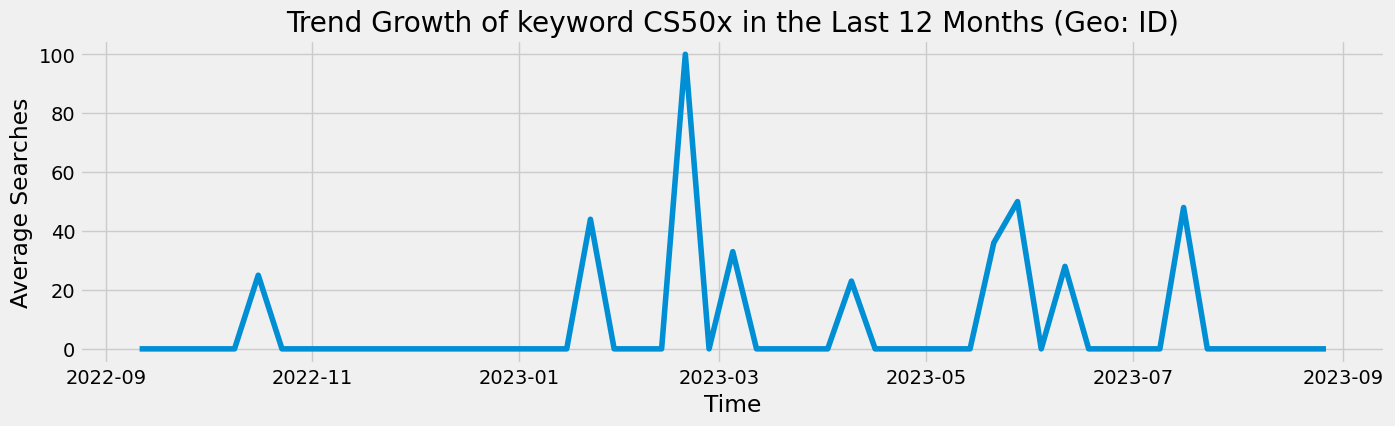

In [6]:
#@title Traffic Trend Growth Chart (RUNNING SEQUENCE 3)
#@markdown View the visualization of keyword traffic trend growth by day
line_chart_title = (f'Trend Growth of keyword {keyword} in the Last {time_range} (Geo: {location})')
fig = plt.figure(figsize=(15, 4))
sns.lineplot(x=df['date'], y=df[keyword], data=df).set(title=line_chart_title)
plt.xlabel('Time')
plt.ylabel('Average Searches')
plt.show()


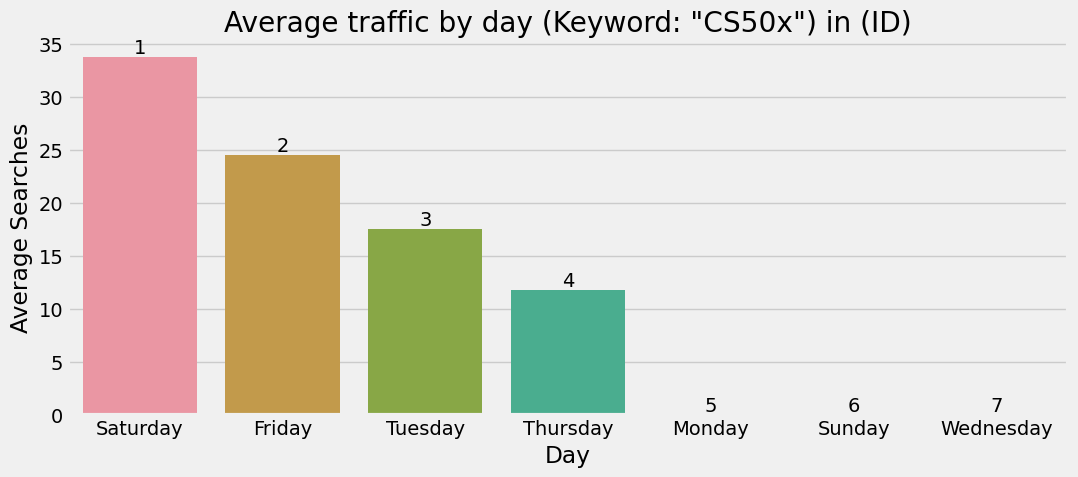

In [7]:
#@title Traffic Trend Visualization by Day (RUNNING SEQUENCE 4)
#@markdown View the day with the highest average traffic
#@markdown
#@markdown ####--------------------------------------------------
#@markdown
#@markdown This can help find the day with the best audience traffic for live streaming on topics related to the keyword.
#@markdown
#@markdown ####--------------------------------------------------
#@markdown
#@markdown Sort the days based on ranking, 👇.
ranking_day = True  #@param {type:"boolean"}
#-----------
df_best_day_sorted = df_best_day_sorted = df_best_day.groupby(df_best_day['day_string'])[keyword].mean().reset_index()
day_distribution_title = (f'Average traffic by day (Keyword: "{keyword}") in ({location})')
ascending = not ranking_day

# If sorting days based on ranking
if ranking_day:

  # Use sort_values to sort the data
  df_best_day_sorted = df_best_day_sorted.sort_values(by=keyword,
                                                     ascending=ascending).copy()

  # Reset the index without adding a new index column
  df_best_day_sorted = df_best_day_sorted.reset_index()

  # Create a 'ranking' column
  df_best_day_sorted['ranking'] = df_best_day_sorted.index + 1

  # Reset the index again after slicing
  df_best_day_sorted = df_best_day_sorted.reset_index()

  fig, ax = plt.subplots(figsize=(11, 5))
  sns.barplot(x=df_best_day_sorted.index, y=keyword,
              data=df_best_day_sorted, ax=ax)

  # Create a list of rankings
  ranking_list_day = df_best_day_sorted['ranking'].tolist()
  ranking_list_day.sort()

  # Add labels to the bars
  for i in range(len(ranking_list_day) - 1, -1, -1):
      val = ranking_list_day[i]
      plt.text(i, df_best_day_sorted.loc[i, keyword],
                val, ha='center', va='bottom')
  plt.xlabel(f'Day')
  plt.ylabel('Average Searches')
  plt.title(day_distribution_title)
  plt.xticks(range(len(df_best_day_sorted)), df_best_day_sorted['day_string'])
  plt.tight_layout()
  plt.show()

if not ranking_day:
  # Sorting
  df_best_day_sorted = df_best_day_sorted.sort_values(by="day_string", ascending=ascending).copy()

  # Visualization
  fig = plt.figure(figsize=(11, 5))
  sns.barplot(x=df_best_day_sorted['day_string'], y=df_best_day_sorted[keyword], data=df_best_day_sorted)
  plt.xlabel(f'Day')
  plt.ylabel('Average Searches')
  plt.title(day_distribution_title)
  plt.show()


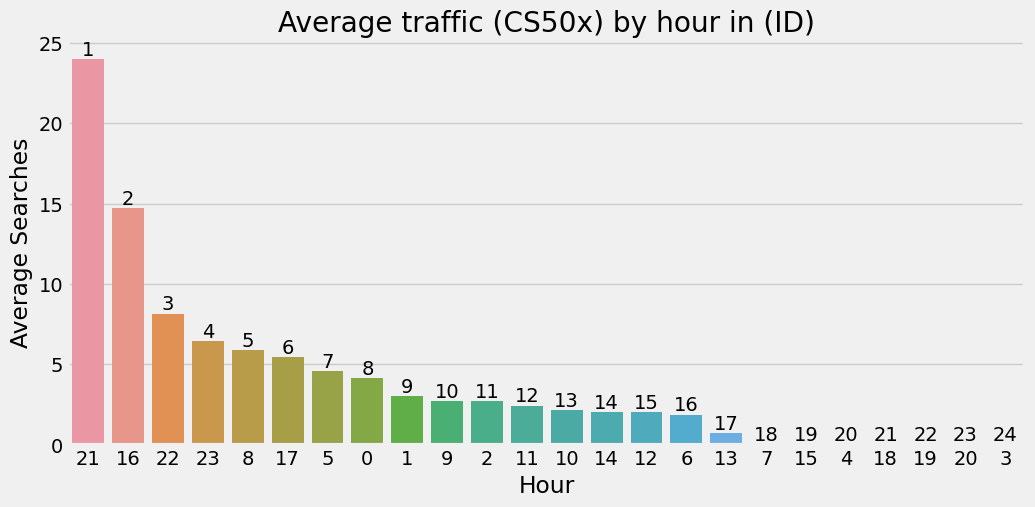

In [8]:
#@title Traffic Visualization by Hour (RUNNING SEQUENCE 5)
#@markdown View the hour with the highest average traffic
#@markdown
#@markdown ####--------------------------------------------------
#@markdown
#@markdown This can help find the hour with the best audience traffic for live streaming on topics related to the keyword.
#@markdown
#@markdown ####--------------------------------------------------
#@markdown
#@markdown Sort hours based on ranking 👇.
ranking_hour = True  #@param {type:"boolean"}
#@markdown (if unchecked, it will not be active).
#@markdown
#@markdown ####--------------------------------------------------
#@markdown
#@markdown Get the top (n) highest. 👇.
n_highest = False  #@param {type:"boolean"}
#@markdown (if unchecked, it will not be active).
#@markdown
#@markdown ####--------------------------------------------------
#@markdown
n_ranking = 10  #@param {type:"integer"}
#@markdown ####--------------------------------------------------
ascending_hour_ranking = not n_highest
ascending_hour = not ranking_hour

hour_distribution_title = (f'Average traffic ({keyword}) by hour in ({location})')
df_best_hour_sorted = df_best_hour.groupby(df_best_hour['date'].dt.hour)[keyword].mean().reset_index().copy()
if n_highest:
  df_best_hour_sorted = df_best_hour_sorted.sort_values(by=keyword, ascending=ascending_hour_ranking).reset_index()
  df_best_hour_sorted = df_best_hour_sorted.head(n_ranking)
else:
  df_best_hour_sorted = df_best_hour_sorted.sort_values(by=keyword, ascending=ascending_hour).reset_index()

#-----------
if ranking_hour:

  df_best_hour_sorted['ranking'] = df_best_hour_sorted.index + 1
  df_best_hour_sorted = df_best_hour_sorted.reset_index()

  ranking_list_hour = df_best_hour_sorted['ranking'].tolist()
  ranking_list_hour.sort()
  fig, ax = plt.subplots(figsize=(11, 5))
  sns.barplot(x=df_best_hour_sorted.index, y=keyword, data=df_best_hour_sorted,
              ax=ax)
  for i in range(len(ranking_list_hour) - 1, -1, -1):
        val = ranking_list_hour[i]
        plt.text(i, df_best_hour_sorted.loc[i, keyword],
                 val, ha='center', va='bottom')
  plt.xticks(range(len(df_best_hour_sorted)), df_best_hour_sorted['date'])
  plt.xlabel(f'Hour')
  plt.ylabel('Average Searches')
  plt.title(hour_distribution_title)
  plt.show()

else:
  # Visualization
  fig = plt.figure(figsize =(11, 5))
  sns.barplot(x=df_best_hour_sorted['date'], y=df_best_hour_sorted[keyword], data=df_best_hour_sorted)
  plt.xlabel(f'Hour')
  plt.ylabel('Average Searches')
  plt.title(hour_distribution_title)
  plt.show()
